In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
pd.set_option('max_columns',500)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hackathon001/Test.xlsx
/kaggle/input/hackathon001/samplesubmission.csv
/kaggle/input/hackathon001/Train.xlsx
/kaggle/input/hackathon001/Problem_Statement.pdf


In [2]:
#Importing Train and test Dataset
train_df = pd.read_excel('../input/hackathon001/Train.xlsx')
test_df = pd.read_excel('../input/hackathon001/Test.xlsx')

In [12]:
#Checking Shape and Datatypes of train Dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16810 entries, 0 to 16809
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   PropertyID                  16810 non-null  object        
 1   Borough                     16810 non-null  int64         
 2   State                       16810 non-null  object        
 3   Surroundings                16810 non-null  object        
 4   Address                     16810 non-null  object        
 5   ZipCode                     16810 non-null  int64         
 6   Block                       16810 non-null  int64         
 7   Lot                         16810 non-null  int64         
 8   BldgClassCategory           16810 non-null  object        
 9   NoOfResidentialUnits        16810 non-null  int64         
 10  NoOfCommercialUnits         16810 non-null  int64         
 11  TotalNoOfUnits              16810 non-null  int64     

In [13]:
train_df.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,1990,1,B1,2014-05-30,540000
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,2014-09-13,750000
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,2014-09-28,470000
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,2014-06-05,570000
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,2015-02-07,640000


**From Seeing the Head Structure itself We can see that the State column has only one value i.e NewYork and the adress column is very random and not useful so we will be removing those columns**

In [14]:
cols_to_drop = ['State','Address']

In [15]:
train_df.drop(columns=cols_to_drop,inplace = True)

In [16]:
test_df.drop(columns=cols_to_drop,inplace = True)

**We Will be dropping propertyID as well its another identifier for each row and is unique for every row **

In [17]:
train_df.drop(columns = 'PropertyID',inplace = True)

**We will be Taking a look at next Column which is Borough**

In [18]:
train_df.Borough.value_counts(normalize=True)*100

5    37.846520
3    29.024390
2    17.221892
1    10.154670
4     5.752528
Name: Borough, dtype: float64

In [19]:
test_df.Borough.value_counts(normalize=True)*100

5    34.570845
3    31.811989
2    17.540872
1     9.707084
4     6.369210
Name: Borough, dtype: float64

**From seeing the unique Value Counts ,There are only 5 categories which corresspond to 5 Boroughs of newyork city so we will be converting Borough column to Category Later on**

In [20]:
#Getting top 100 categories of Surroundings column an exporting it as a dataframe
top_Surroundings = train_df['Surroundings'].value_counts(normalize=True).head(100).to_frame()

In [21]:
#only using the index column as a list
top_50_Surroundings = top_Surroundings.index.to_list()


In [22]:
top_50_Surroundings[2]

'BAYSIDE'

**We won't be including all the 224 different categories of surroundings column so we will be choosing top 100 surroundings which capture upto 95% of the data **

**Filter all the values present in only top 100 surroudings**

In [32]:
train_df = train_df[train_df['Surroundings'].isin(top_50_Surroundings)]

In [33]:
test_df = test_df[test_df['Surroundings'].isin(top_50_Surroundings)]

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13894 entries, 45 to 16801
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Borough                     13894 non-null  int64         
 1   Surroundings                13894 non-null  object        
 2   ZipCode                     13894 non-null  int64         
 3   Block                       13894 non-null  int64         
 4   Lot                         13894 non-null  int64         
 5   BldgClassCategory           13894 non-null  object        
 6   NoOfResidentialUnits        13894 non-null  int64         
 7   NoOfCommercialUnits         13894 non-null  int64         
 8   TotalNoOfUnits              13894 non-null  int64         
 9   LandAreaInSqFt              13894 non-null  int64         
 10  GrossAreaInSqFt             13894 non-null  int64         
 11  YearOfConstruction          13894 non-null  int64    

In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 14 to 2932
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   PropertyID                  2343 non-null   object        
 1   Borough                     2343 non-null   int64         
 2   Surroundings                2343 non-null   object        
 3   ZipCode                     2343 non-null   int64         
 4   Block                       2343 non-null   int64         
 5   Lot                         2343 non-null   int64         
 6   BldgClassCategory           2343 non-null   object        
 7   NoOfResidentialUnits        2343 non-null   int64         
 8   NoOfCommercialUnits         2343 non-null   int64         
 9   TotalNoOfUnits              2343 non-null   int64         
 10  LandAreaInSqFt              2343 non-null   int64         
 11  GrossAreaInSqFt             2343 non-null   int64      

**Getting top 100 Zip Codes and Filtering the data**

In [36]:
top_100_ZipCodes = train_df['ZipCode'].value_counts(normalize=True).head(100).to_frame()
top_100_ZipCodes = top_100_ZipCodes.index.to_list()

In [38]:
train_df = train_df[train_df['ZipCode'].isin(top_100_ZipCodes)]
test_df = test_df[test_df['ZipCode'].isin(top_100_ZipCodes)]

**Removing Block Column As it has too many random numbers which hold no weight**

In [39]:
train_df.drop(columns='Block',inplace=True)
test_df.drop(columns='Block',inplace=True)

In [40]:
train_df.drop(columns='BldgClassCategory',inplace=True)
test_df.drop(columns='BldgClassCategory',inplace=True)

In [41]:
test_df.TaxClass_AtEvaluationTime.value_counts()

1    1966
2     227
4     127
Name: TaxClass_AtEvaluationTime, dtype: int64

In [42]:
train_df.TaxClass_AtEvaluationTime.value_counts()

1    11787
2     1406
4      585
Name: TaxClass_AtEvaluationTime, dtype: int64

**Getting only the first letter of the building class**

In [43]:
train_df['BldgClass_AtEvaluationTime'] =  train_df.BldgClass_AtEvaluationTime.str[0]

In [44]:
test_df['BldgClass_AtEvaluationTime'] =  test_df.BldgClass_AtEvaluationTime.str[0]

In [45]:
import seaborn as sns

In [46]:
train_df['BldgClass_AtEvaluationTime'].unique()

array(['A', 'B', 'R', 'K', 'S', 'E', 'C', 'W', 'V', 'D', 'F', 'I', 'G',
       'O', 'M', 'P', 'N', 'Q', 'H', 'Z'], dtype=object)

In [47]:
bldg_class = test_df['BldgClass_AtEvaluationTime'].unique()

In [48]:
 train_df = train_df[train_df['BldgClass_AtEvaluationTime'].isin(bldg_class)]

In [49]:
train_df.BldgClass_AtEvaluationTime.value_counts()

A    6342
B    4050
R    1664
C    1022
H     143
K     129
S     111
E      79
G      60
O      57
F      41
D      28
M      17
V      13
W      10
Z       3
Name: BldgClass_AtEvaluationTime, dtype: int64

In [50]:
test_df.BldgClass_AtEvaluationTime.value_counts()

A    1053
B     690
R     287
C     154
H      44
K      28
E      17
S      14
O      12
G       8
F       6
D       3
W       1
Z       1
V       1
M       1
Name: BldgClass_AtEvaluationTime, dtype: int64

In [51]:
train_df

,Borough,Surroundings,ZipCode,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
45,3,NEW DORP,10306,7,1,0,1,4000,975,1950,1,A,2013-05-16,385000
46,3,NEW DORP,10306,158,2,0,2,4465,2150,1960,1,B,2013-02-13,515000
47,3,NEW DORP,10306,53,1,0,1,5000,1296,1946,1,A,2014-05-11,640000
48,3,NEW DORP,10306,28,1,0,1,2200,1280,1971,1,A,2014-12-07,450000
49,3,NEW DORP,10306,73,1,0,1,2377,1800,1996,1,A,2012-10-18,370000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16796,4,UPPER EAST SIDE (79-96),10128,1142,1,0,1,7755,1489,2011,2,R,2015-02-26,2420000
16797,4,UPPER EAST SIDE (79-96),10128,1162,1,0,1,13000,562,1983,2,R,2014-05-22,765000
16798,4,UPPER EAST SIDE (79-96),10128,1528,1,0,1,45739,854,1982,2,R,2015-03-20,1291342
16799,4,UPPER EAST SIDE (79-96),10128,1320,1,0,1,10070,624,1998,2,R,2014-04-03,893718


**Getting Only the Year for date of evaluation**

In [ ]:
train_df['DateOfEvaluation']= train_df.DateOfEvaluation.dt.year

In [54]:
test_df['DateOfEvaluation']= test_df.DateOfEvaluation.dt.year

In [55]:
train_df.head()

,Borough,Surroundings,ZipCode,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
45,3,NEW DORP,10306,7,1,0,1,4000,975,1950,1,A,2013,385000
46,3,NEW DORP,10306,158,2,0,2,4465,2150,1960,1,B,2013,515000
47,3,NEW DORP,10306,53,1,0,1,5000,1296,1946,1,A,2014,640000
48,3,NEW DORP,10306,28,1,0,1,2200,1280,1971,1,A,2014,450000
49,3,NEW DORP,10306,73,1,0,1,2377,1800,1996,1,A,2012,370000


In [56]:
train_df['AgeOfBuilding'] = train_df.DateOfEvaluation - train_df.YearOfConstruction

In [57]:
test_df['AgeOfBuilding'] = test_df.DateOfEvaluation - test_df.YearOfConstruction

In [58]:
test_df.head()

,PropertyID,Borough,Surroundings,ZipCode,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,AgeOfBuilding
14,PR51115,3,NEW DORP,10306,14,2,0,2,3450,1600,2000,1,B,2014,14
15,PR51116,3,NEW DORP,10306,48,2,0,2,4000,1326,1950,1,B,2013,63
16,PR51117,3,NEW DORP,10306,1,1,0,1,4700,1460,1941,1,A,2015,74
17,PR51118,3,NEW DORP,10306,30,1,0,1,2500,1200,1966,1,A,2014,48
18,PR51119,3,NEW DORP,10306,175,1,0,1,4275,2136,1960,1,A,2012,52


In [59]:
train_df.columns

Index(['Borough', 'Surroundings', 'ZipCode', 'Lot', 'NoOfResidentialUnits',
       'NoOfCommercialUnits', 'TotalNoOfUnits', 'LandAreaInSqFt',
       'GrossAreaInSqFt', 'YearOfConstruction', 'TaxClass_AtEvaluationTime',
       'BldgClass_AtEvaluationTime', 'DateOfEvaluation',
       'PropertyEvaluationvalue', 'AgeOfBuilding'],
      dtype='object')

In [60]:
cols_to_category = ['Borough','Surroundings','ZipCode','BldgClass_AtEvaluationTime','TaxClass_AtEvaluationTime']

In [61]:
train_df[cols_to_category] =train_df[cols_to_category].astype('category')

In [63]:
test_df[cols_to_category] =test_df[cols_to_category].astype('category')

In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13769 entries, 45 to 16800
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Borough                     13769 non-null  category
 1   Surroundings                13769 non-null  category
 2   ZipCode                     13769 non-null  category
 3   Lot                         13769 non-null  int64   
 4   NoOfResidentialUnits        13769 non-null  int64   
 5   NoOfCommercialUnits         13769 non-null  int64   
 6   TotalNoOfUnits              13769 non-null  int64   
 7   LandAreaInSqFt              13769 non-null  int64   
 8   GrossAreaInSqFt             13769 non-null  int64   
 9   YearOfConstruction          13769 non-null  int64   
 10  TaxClass_AtEvaluationTime   13769 non-null  category
 11  BldgClass_AtEvaluationTime  13769 non-null  category
 12  DateOfEvaluation            13769 non-null  int64   
 13  PropertyEvaluat

In [65]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2320 entries, 14 to 2932
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   PropertyID                  2320 non-null   object  
 1   Borough                     2320 non-null   category
 2   Surroundings                2320 non-null   category
 3   ZipCode                     2320 non-null   category
 4   Lot                         2320 non-null   int64   
 5   NoOfResidentialUnits        2320 non-null   int64   
 6   NoOfCommercialUnits         2320 non-null   int64   
 7   TotalNoOfUnits              2320 non-null   int64   
 8   LandAreaInSqFt              2320 non-null   int64   
 9   GrossAreaInSqFt             2320 non-null   int64   
 10  YearOfConstruction          2320 non-null   int64   
 11  TaxClass_AtEvaluationTime   2320 non-null   category
 12  BldgClass_AtEvaluationTime  2320 non-null   category
 13  DateOfEvaluation 

In [66]:
px.bar(data_frame=train_df,x='PropertyEvaluationvalue',y='BldgClass_AtEvaluationTime',color='TaxClass_AtEvaluationTime')

**Looking for Outliers**

<AxesSubplot:>

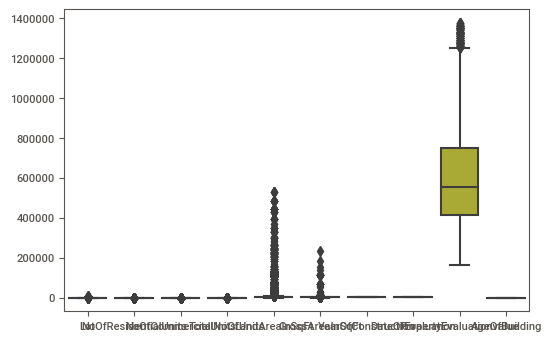

In [74]:
sns.boxplot(data=train_df)

**Taking deeper look at PropertyEvaluationvalue **

In [67]:
fig = px.box(train_df, y='PropertyEvaluationvalue')
fig.show()

**Removing outliers Through IQR method**

In [68]:
q1 = train_df.PropertyEvaluationvalue.quantile(0.25)
q3 = train_df.PropertyEvaluationvalue.quantile(0.75)
iqr = q3-q1
upper_limit = q3+(1.5*iqr)
lower_limit = (1.5*iqr)-q1
print("upper_limit =",upper_limit )
print("lower_limit = ",lower_limit)

upper_limit = 1376300.0
lower_limit =  160500.0


In [70]:
 train_df = train_df[(train_df.PropertyEvaluationvalue <= upper_limit) & (train_df.PropertyEvaluationvalue >= lower_limit)]

In [71]:
px.box(data_frame = train_df ,y='AgeOfBuilding')

**Loking for outliers in GrossAreaInSqFt**

In [72]:
px.box(data_frame = train_df ,y='GrossAreaInSqFt')

**Removing Outliers Through IQR method**

In [75]:
q1 = train_df.GrossAreaInSqFt.quantile(0.25)
q3 = train_df.GrossAreaInSqFt.quantile(0.75)
iqr = q3-q1
upper_limit = q3+(1.5*iqr)
lower_limit = (1.5*iqr)-q1
print("upper_limit =",upper_limit )
print("lower_limit = ",lower_limit)

upper_limit = 3874.0
lower_limit =  366.0


In [76]:
train_df = train_df[(train_df.GrossAreaInSqFt <= upper_limit) & (train_df.GrossAreaInSqFt >= lower_limit)]

In [77]:
px.box(data_frame = train_df ,y='GrossAreaInSqFt')

**Looking at distribution of target Column**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='PropertyEvaluationvalue', ylabel='Density'>

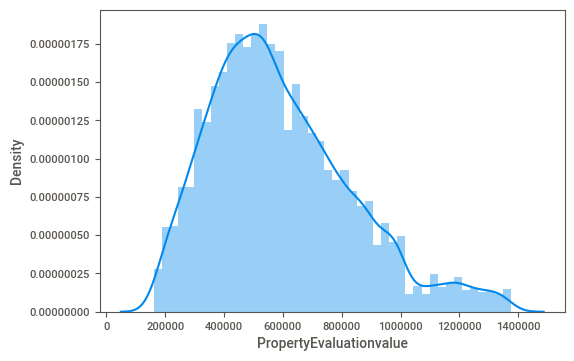

In [78]:
sns.distplot(train_df.PropertyEvaluationvalue)

**Target Column is normally distributed with a little bit of skewness towards the right,we can proceed ahead as some properties may have slightly higher evaluations compared to other properties due to some specialities such as corner property,location etc**

In [81]:
corr = train_df.corr()

**Lets look at correlation plot to see if there are correlation amoung columns**

<AxesSubplot:>

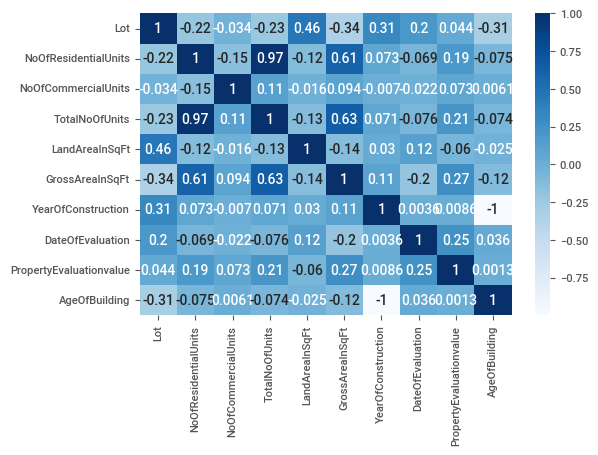

In [82]:

sns.heatmap(corr,annot = True,cmap='Blues')

**seperating the target column**

In [85]:
y = train_df['PropertyEvaluationvalue']

In [86]:
Train = train_df.drop('PropertyEvaluationvalue',axis = 1)

In [87]:
Train.shape

(12190, 14)

In [88]:
PropertyID = test_df.PropertyID
print(PropertyID)

14      PR51115
15      PR51116
16      PR51117
17      PR51118
18      PR51119
         ...   
2928    PR54029
2929    PR54030
2930    PR54031
2931    PR54032
2932    PR54033
Name: PropertyID, Length: 2320, dtype: object


In [89]:
test = test_df.drop('PropertyID',axis = 1)

In [90]:
test.shape

(2320, 14)

In [91]:
Train.shape

(12190, 14)

In [93]:
test.head()

,Borough,Surroundings,ZipCode,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,AgeOfBuilding
14,3,NEW DORP,10306,14,2,0,2,3450,1600,2000,1,B,2014,14
15,3,NEW DORP,10306,48,2,0,2,4000,1326,1950,1,B,2013,63
16,3,NEW DORP,10306,1,1,0,1,4700,1460,1941,1,A,2015,74
17,3,NEW DORP,10306,30,1,0,1,2500,1200,1966,1,A,2014,48
18,3,NEW DORP,10306,175,1,0,1,4275,2136,1960,1,A,2012,52


In [ ]:
Train.head()

**Getting a list of all categorical columns**

In [94]:
categorical_cols = train_df.select_dtypes(include='category').columns.to_list()

In [95]:
categorical_cols

['Borough',
 'Surroundings',
 'ZipCode',
 'TaxClass_AtEvaluationTime',
 'BldgClass_AtEvaluationTime']

**Dummyfying all the Categorical Columns**

In [96]:
X_train = pd.get_dummies(data=Train,columns=categorical_cols,drop_first=True)

In [97]:
X_test = pd.get_dummies(data=test,columns=categorical_cols,drop_first=True)

In [98]:
y_test = pd.read_csv('../input/hackathon001/samplesubmission.csv',usecols=['PropertyEvaluationvalue'])

In [99]:
y_test = y_test[:2320]

In [100]:
print(X_train.shape,X_test.shape)

(12190, 228) (2320, 228)


**Importing all the required metrics and algorithms**

In [104]:
from sklearn.metrics import mean_absolute_percentage_error

**Linear Regression**

In [102]:
from sklearn.linear_model import LinearRegression

In [127]:
lm = LinearRegression()
lm.fit(X_train,y)
train_preds = lm.predict(X_train)
test_preds = lm.predict(X_test)
print("MAPE for train : ",mean_absolute_percentage_error(y,train_preds))
print("MAPE for test : ",mean_absolute_percentage_error(y_test.PropertyEvaluationvalue,test_preds))

MAPE for train :  0.24234958025193415
MAPE for test :  0.6962317195359753


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='PropertyEvaluationvalue'>

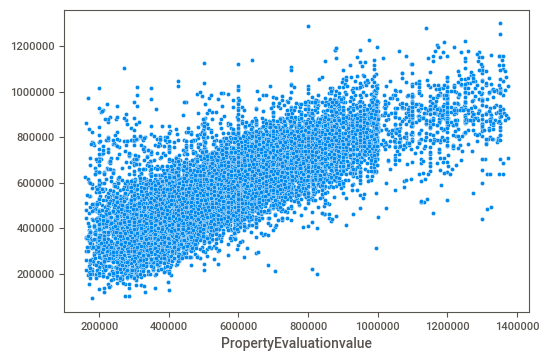

In [111]:
sns.scatterplot(y,train_preds)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='PropertyEvaluationvalue', ylabel='PropertyEvaluationvalue'>

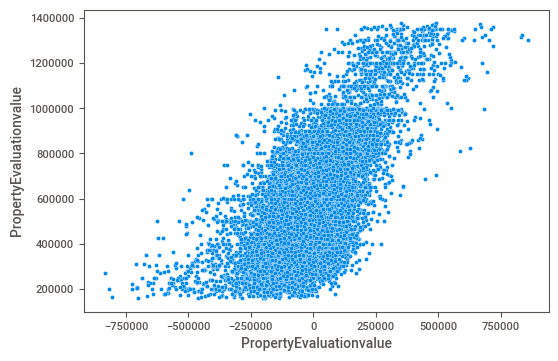

In [113]:
sns.scatterplot((y-train_preds),y)

**Residuals Happen to be Normally Distributed**

<AxesSubplot:xlabel='PropertyEvaluationvalue', ylabel='Count'>

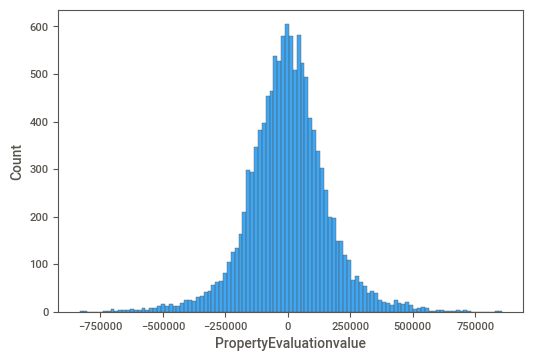

In [114]:
sns.histplot(y-train_preds)

**RandomForestregressor Using Default Properties**

In [132]:
from sklearn.ensemble import RandomForestRegressor

In [133]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y)
train_preds = rfr.predict(X_train)
test_preds = rfr.predict(X_test)
print("MAPE for train : ",mean_absolute_percentage_error(y,train_preds))
print("MAPE for test : ",mean_absolute_percentage_error(y_test,test_preds))

MAPE for train :  0.07710543584450923
MAPE for test :  0.4421290209192049


In [134]:
submission = pd.DataFrame({'PropertyID':PropertyID,'PropertyEvaluationvalue':test_preds})

<AxesSubplot:xlabel='PropertyEvaluationvalue', ylabel='Count'>

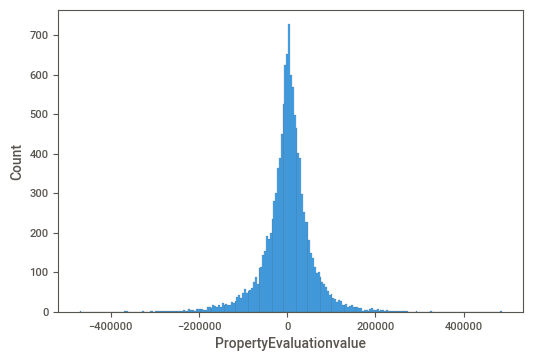

In [135]:
sns.histplot(y-train_preds)

In [ ]:
submission.to_csv('Submission.csv',index=False)